<a href="https://colab.research.google.com/github/Riddhi-14/Assessments/blob/main/CNNassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, GaussianNoise
from keras.utils import to_categorical

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build a simple neural network with GaussianNoise for noise during training
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(GaussianNoise(0.2))  # Adding noise during training
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Add noise to the test data
noise_factor = 0.2
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

# Evaluate the model on noisy test data
loss, accuracy = model.evaluate(test_images_noisy, test_labels)
print(f"Accuracy on Noisy Test Data: {accuracy}")



11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2700 - accuracy: 0.9222 - val_loss: 0.1433 - val_accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1249 - accuracy: 0.9623 - val_loss: 0.1046 - val_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0868 - accuracy: 0.9740 - val_loss: 0.0958 - val_accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0671 - accuracy: 0.9795 - val_loss: 0.0815 - val_accuracy: 0.9745
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8496
Accuracy on Noisy Test Data: 0.8496000170707703


In [ ]:
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Rest of the code remains the same as in the MNIST example


170498071/170498071 [==============================] - 6s 0us/step


Epoch 1/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4757 - accuracy: 0.4775 - val_loss: 1.2502 - val_accuracy: 0.5508
Epoch 2/5
1563/1563 [==============================] - 57s 37ms/step - loss: 1.1842 - accuracy: 0.5839 - val_loss: 1.2669 - val_accuracy: 0.5583
Epoch 3/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0481 - accuracy: 0.6329 - val_loss: 1.2404 - val_accuracy: 0.5753
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9340 - accuracy: 0.6726 - val_loss: 1.1854 - val_accuracy: 0.5940
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8306 - accuracy: 0.7101 - val_loss: 1.2175 - val_accuracy: 0.5886


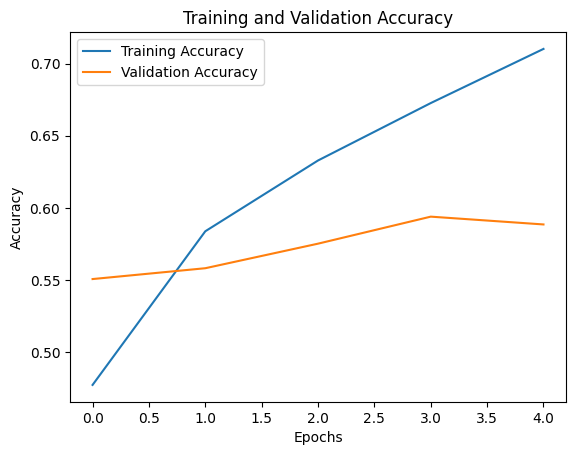

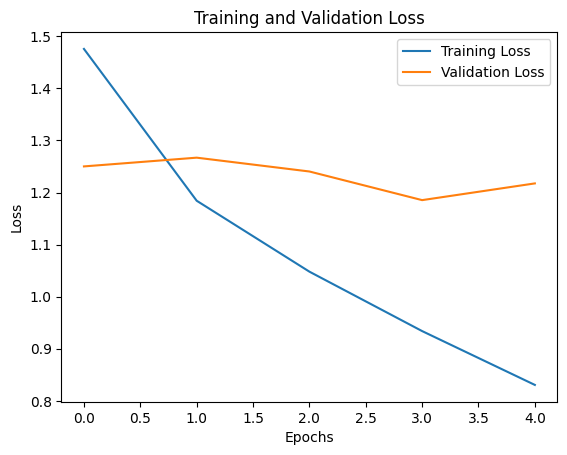

313/313 [==============================] - 3s 8ms/step - loss: 1.2175 - accuracy: 0.5886
Accuracy without Pooling: 0.5885999798774719


In [7]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build a simple neural network without pooling and an additional convolutional layer
model_without_pooling = Sequential()
model_without_pooling.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_without_pooling.add(Flatten())
model_without_pooling.add(Dense(128, activation='relu'))
model_without_pooling.add(Dense(10, activation='softmax'))

# Compile the model
model_without_pooling.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_without_pooling.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on test data
loss, accuracy = model_without_pooling.evaluate(test_images, test_labels)
print(f"Accuracy without Pooling: {accuracy}")
